### This file plots the processed csv files with matplotlib

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [13]:
date = '2018-11-03_10h45'
worker_list = [8,16,32,64]
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/' + date + '/'

## Throughput plot for read loads

In [14]:
# read data into pandas dataframe
df_tp = pd.read_csv(base_path + 'two_mws_mem_tp.csv')
df_tp

,client,worker,write_tp_mean,write_tp_std,read_tp_mean,read_tp_std
0,12,8,6214.270000,38.568249,2950.910000,1.708157
1,12,16,6174.250000,44.684459,2951.540000,1.651080
2,12,32,6146.760000,72.989512,2948.203333,0.584599
3,12,64,6088.800000,49.600553,2953.740000,5.300987
4,24,8,8486.140000,17.656145,2950.703333,6.951404
5,24,16,8718.060000,37.236343,2958.363333,1.478408
6,24,32,8610.663333,23.976094,2961.153333,17.635646
7,24,64,8522.123333,65.026637,2957.996667,4.092932
8,48,8,9536.503333,139.204468,2951.283333,3.296082
9,48,16,10452.516667,105.682596,2954.150000,1.074833


In [15]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

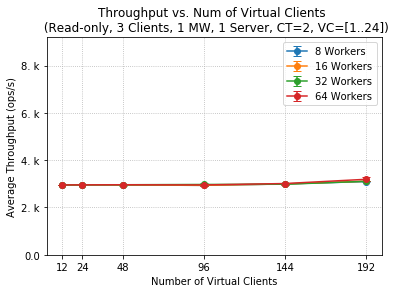

In [16]:
f = plt.figure()
plt.title("Throughput vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..24])")

for worker in worker_list:
    # extract values of interest
    df_tp_cut = df_tp[(df_tp.worker == worker)]
    
    vcs = df_tp_cut['client']
    tps = df_tp_cut['read_tp_mean']
    std = df_tp_cut['read_tp_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Throughput (ops/s)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=6e3+np.max(df_tp['read_tp_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/two_mws_mem_tp_read.png", dpi = 150)


## Throughput plot for write loads

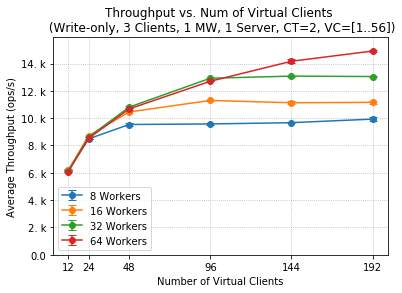

In [17]:
f = plt.figure()
plt.title("Throughput vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")

for worker in worker_list:
    # extract values of interest
    df_tp_read_cut = df_tp[(df_tp.worker == worker)]
    
    vcs = df_tp_read_cut['client']
    tps = df_tp_read_cut['write_tp_mean']
    std = df_tp_read_cut['write_tp_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Throughput (ops/s)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=1e3+np.max(df_tp['write_tp_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/two_mws_mem_tp_write.png", dpi = 150)


## Response-time plot for read loads

In [18]:
# read data into pandas dataframe
df_rt = pd.read_csv(base_path + 'two_mws_mem_rt.csv')
df_rt

,client,worker,write_rt_mean,write_rt_std,read_rt_mean,read_rt_std
0,12,8,1.933889,0.011413,4.068889,0.003425
1,12,16,1.947222,0.012197,4.068333,0.000000
2,12,32,1.954444,0.023973,4.077222,0.004157
3,12,64,1.971111,0.015051,4.063889,0.004157
4,24,8,2.827222,0.006713,8.141111,0.017498
5,24,16,2.757222,0.011733,8.113889,0.003425
6,24,32,2.791111,0.007857,5.687222,3.381588
7,24,64,2.820000,0.021900,8.113333,0.011863
8,48,8,5.063889,0.033231,16.267222,0.017231
9,48,16,4.575000,0.023844,16.246667,0.005932


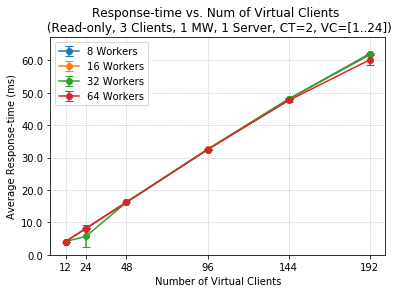

In [19]:
f = plt.figure()
plt.title("Response-time vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..24])")

for worker in worker_list:
    # extract values of interest
    df_rt_cut = df_rt[(df_rt.worker == worker)]
    
    vcs = df_rt_cut['client']
    tps = df_rt_cut['read_rt_mean']
    std = df_rt_cut['read_rt_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Response-time (ms)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_rt['read_rt_mean'])+5)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/two_mws_mem_rt_read.png", dpi = 150)


## Response-time plot for write loads

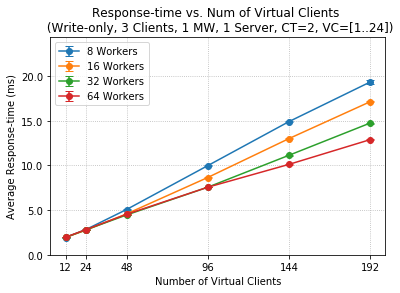

In [20]:
f = plt.figure()
plt.title("Response-time vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..24])")

for worker in worker_list:
    # extract values of interest
    df_rt_cut = df_rt[(df_rt.worker == worker)]
    
    vcs = df_rt_cut['client']
    tps = df_rt_cut['write_rt_mean']
    std = df_rt_cut['write_rt_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Response-time (ms)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_rt['write_rt_mean'])+5)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/two_mws_mem_rt_write.png", dpi = 150)
